# Project: Wrangling and Analyzing Data (@weratedogs twitter archives)

Table of Content:

    Introduction
    Gather
    Asess
    Clean
    Store, Analyse, and Visualise
    Wrangling Data Reports
    Communicate Findngs Reports



# Introduction:
This dataset contains data downloaded from the twitter archive of @weratesdogs also known as @dog_rates, a twitter account popularly known for rating people's dogs using funny comments. Like many real life data, this downloaded data does not come clean. The goal of the project is to use python and its libraries in order to create interesting and trustworthy analyses and visualisations. 

# Gathering the data:

For this project, the data will be gathered from three different resources, including;

    1. Enhanced Twitter Archived which is the WeRateDogs Twitter archive and contains basic tweet data for all 5000+ of their tweets, but not everything. This data was provided to me.
    2. Additional Data via the Twitter API- was also provided by udacity, as I experienced some difficulties with API twitter authorisation. 
    3. Image Predictions File which was also provided to me and contains classification of breeds of dogs.



In [2]:
#load the necessary libraries for data wrangling
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings

In [3]:
#read in the twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#read in the image predictions data programmaticatlly
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Fetching additional data from Twitter API using the code provided in the instructor's note, as I had difficultions with API authorisation from twitter.

In [5]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

In [6]:
#reading in the json txt file to create a dataframe with tweet_id, retweet_count and favorite_count
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        
        df_list.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
       
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing the data:

This section of the projec will sift through the data to chect for quality and tidiness issues, asking questions like; Is the data clean enough? Does it make sense? How can it be cleaner or more tidy?


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
twitter_archive['name'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(twitter_archive['name'].value_counts())

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Lola               10
Tucker             10
Penny              10
Bo                  9
Winston             9
Sadie               8
the                 8
an                  7
Daisy               7
Buddy               7
Bailey              7
Toby                7
Jax                 6
Leo                 6
Oscar               6
Scout               6
Koda                6
Rusty               6
Bella               6
Stanley             6
Milo                6
Dave                6
Jack                6
Chester             5
George              5
Sammy               5
Sunny               5
Finn                5
very                5
Phil                5
Bentley             5
Oakley              5
Gus                 5
Louis               5
Alfie               5
Larry               5
Bruce               4
Hank                4
Sampson             4
quite     

In [12]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Issues identified from the assessment 

Quality Issues: 
1. The first dataframe (twitter_archived) contains retweets. 
2. Incorrect ratings in the twitter_archived dataframe
3. Error in the dog names column in the twitter_archived dataframe
4. Incorrect datatype for timestamp
5. Lowercase dog breed names in the second data frame(image_predictions)
6. p1, p2, and p3 columns in the image_predictions dataframe contain underscores instead of spaces.
7. Extract more infore information from image predictions
8. Incorect datatype for the dog_stages

Tidy Issues: 
Merge the three dataframes i.e. twitter_archived, tweet_json and image_predictions. 
Drop columns that are not needed. Too many columns for dog stages (pupper, floofer..

# Cleaning the data: 


In [17]:
#creating copies of the dataframes about to be cleaned
cleaned_twitterarchive = twitter_archive.copy()
cleaned_imagepredictions = image_predictions.copy()
cleaned_tweetjson = tweet_json.copy()

Issue 1:The first dataframe contains retweets. 
There are 181 retweets in the twitter_archived ddataframe, remove them by only keeping the null rows of the retweet_status_id column. 

In [18]:
cleaned_twitterarchive = cleaned_twitterarchive[cleaned_twitterarchive.retweeted_status_id.isnull()]

In [19]:
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [20]:
#remove the retweeted_status_id, retweeted_status_user_id and the retweeted_status_timestamp columns
cleaned_twitterarchive = cleaned_twitterarchive.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

In [21]:
#check to see if the above operation has been successfully performed
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

Issue 2: Missing Data in the expanded urls. 
There are some missing data in the expanded urls, this will be cleaned by removing the tweets without the expanded urls (images). 

In [22]:
cleaned_twitterarchive = cleaned_twitterarchive[cleaned_twitterarchive.expanded_urls.notnull()]

In [23]:
#check to see if the above operation has been succesfully performed
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2117 non-null   int64  
 8   rating_denominator     2117 non-null   int64  
 9   name                   2117 non-null   object 
 10  doggo                  2117 non-null   object 
 11  floofer                2117 non-null   object 
 12  pupper                 2117 non-null   object 
 13  puppo                  2117 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ 

Issue 3 (Tidiness) Merge the three dataframes

In [24]:
#first merge cleaned_twitterarchive with cleaned_tweetjson
cleaned_twitterarchive = pd.merge(cleaned_twitterarchive, cleaned_tweetjson, 
                                    on = ['tweet_id'], how = 'left')

In [25]:
#check to see if the above operation has been succesfully performed
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2117 non-null   int64  
 8   rating_denominator     2117 non-null   int64  
 9   name                   2117 non-null   object 
 10  doggo                  2117 non-null   object 
 11  floofer                2117 non-null   object 
 12  pupper                 2117 non-null   object 
 13  puppo                  2117 non-null   object 
 14  retweet_count          2117 non-null   int64  
 15  favo

In [26]:
#merge cleaned_twitterarchive with cleaned_imagepredictions
cleaned_twitterarchive= pd.merge(cleaned_twitterarchive, cleaned_imagepredictions, 
                                    on = ['tweet_id'], how = 'left')

In [27]:
#check to see if the above operation has been succesfully performed
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2117 non-null   int64  
 8   rating_denominator     2117 non-null   int64  
 9   name                   2117 non-null   object 
 10  doggo                  2117 non-null   object 
 11  floofer                2117 non-null   object 
 12  pupper                 2117 non-null   object 
 13  puppo                  2117 non-null   object 
 14  retweet_count          2117 non-null   int64  
 15  favo

Issue 4:incorrect datatype for tweet_id. 
This will be changed from integer to string

In [28]:
cleaned_twitterarchive['tweet_id'] = cleaned_twitterarchive['tweet_id'].astype(str)

In [29]:
#check to see if the above operation has been succesfully performed
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2117 non-null   int64  
 8   rating_denominator     2117 non-null   int64  
 9   name                   2117 non-null   object 
 10  doggo                  2117 non-null   object 
 11  floofer                2117 non-null   object 
 12  pupper                 2117 non-null   object 
 13  puppo                  2117 non-null   object 
 14  retweet_count          2117 non-null   int64  
 15  favo

Issue 5: Incorrect datatype for timestamp
This should be changed to a datetime object
    

In [30]:
#removing the timezone information
cleaned_twitterarchive['timestamp'] = cleaned_twitterarchive['timestamp'].str.slice(start=0, stop=-6)

In [31]:
#changing the datatype to datetime object
cleaned_twitterarchive['timestamp'] = pd.to_datetime(cleaned_twitterarchive['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [32]:
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2117 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              2117 non-null   datetime64[ns]
 4   source                 2117 non-null   object        
 5   text                   2117 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2117 non-null   int64         
 8   rating_denominator     2117 non-null   int64         
 9   name                   2117 non-null   object        
 10  doggo                  2117 non-null   object        
 11  floofer                2117 non-null   object        
 12  pupper                 2117 non-null   object        
 13  pup

Issue 6: Inaccurate names

The name column in the twitter_archived dataframe has values that appear inaccuate and upon visual examination of the column, it also appears that the incorrect names are in lowercase. 
All the names that start with a lowercase will be replaced with None

In [33]:
lowercase_names = []
for row in cleaned_twitterarchive['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [34]:
# Replace all names that start with a lowercase letter with a None
cleaned_twitterarchive['name'].replace(lowercase_names, 
                        None,
                       inplace = True)

In [35]:
#check to see if the above operation has been succesfully performed
cleaned_twitterarchive['name'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cleaned_twitterarchive['name'].value_counts())

None              662
Oliver             12
Lucy               11
Charlie            11
Cooper             10
Tucker              9
Penny               9
Winston             8
Sadie               8
Lola                8
Daisy               8
Toby                7
Stanley             7
Bo                  6
Bella               6
Oscar               6
Louis               6
Bentley             6
Jax                 6
Koda                6
Bailey              6
Scout               5
Buddy               5
Dave                5
Walter              5
Leo                 5
Rusty               5
Gary                5
Chester             5
Jeffrey             5
Milo                5
Waffles             4
Jack                4
Archie              4
Sebastian           4
Scooter             4
Sammy               4
Phil                4
Gus                 4
Oakley              4
Maggie              4
Clarence            4
Ted                 4
Jerry               4
Finn                4
Sophie    

In [36]:
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2117 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              2117 non-null   datetime64[ns]
 4   source                 2117 non-null   object        
 5   text                   2117 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2117 non-null   int64         
 8   rating_denominator     2117 non-null   int64         
 9   name                   2117 non-null   object        
 10  doggo                  2117 non-null   object        
 11  floofer                2117 non-null   object        
 12  pupper                 2117 non-null   object        
 13  pup

Issue 7: Incorrect Ratings

In [37]:
#convert ratings from integer to float to allow decimal values
cleaned_twitterarchive['rating_numerator'] = cleaned_twitterarchive['rating_numerator'].astype(float)
cleaned_twitterarchive['rating_denominator'] = cleaned_twitterarchive['rating_denominator'].astype(float)

In [38]:
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2117 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              2117 non-null   datetime64[ns]
 4   source                 2117 non-null   object        
 5   text                   2117 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2117 non-null   float64       
 8   rating_denominator     2117 non-null   float64       
 9   name                   2117 non-null   object        
 10  doggo                  2117 non-null   object        
 11  floofer                2117 non-null   object        
 12  pupper                 2117 non-null   object        
 13  pup

In [39]:
#gathering tweets, texts and indices that contain a decimal in the rating_numerator 

dogratings_decimals_text = []
dogratings_decimals_index = []
dogratings_decimals = []

for i, text in cleaned_twitterarchive['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        dogratings_decimals_text.append(text)
        dogratings_decimals_index.append(i)
        dogratings_decimals.append(re.search('\d+\.\d+', text).group())

In [40]:
dogratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [41]:
dogratings_decimals_index

[41, 531, 588, 1486]

In [42]:
#converting the decimal ratings from the output above to float
cleaned_twitterarchive.loc[dogratings_decimals_index[0],'rating_numerator'] = float(dogratings_decimals[0])
cleaned_twitterarchive.loc[dogratings_decimals_index[1],'rating_numerator'] = float(dogratings_decimals[1])
cleaned_twitterarchive.loc[dogratings_decimals_index[2],'rating_numerator'] = float(dogratings_decimals[2])
cleaned_twitterarchive.loc[dogratings_decimals_index[3],'rating_numerator'] = float(dogratings_decimals[3])

In [43]:
#check to see if the above operation was performed successfully
cleaned_twitterarchive.loc[531]

tweet_id                                                786709082849828864
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2016-10-13 23:23:56
source                   <a href="http://twitter.com/download/iphone" r...
text                     This is Logan, the Chow who lived. He solemnly...
expanded_urls            https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                      9.75
rating_denominator                                                      10
name                                                                 Logan
doggo                                                                 None
floofer                                                               None
pupper                                                                None
puppo                    

In [44]:
# Standardize the dog ratings by creating a new column called rating with the calculated values 
cleaned_twitterarchive['rating'] = cleaned_twitterarchive['rating_numerator'] / cleaned_twitterarchive['rating_denominator']

In [45]:
#check to see if the above operation was performed successfully
cleaned_twitterarchive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.5
2113,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.6
2114,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.9
2115,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.7


Issue 8: Four different columns for dog_stages.

Combine them into one

In [46]:
cleaned_twitterarchive['dog_stage'] = cleaned_twitterarchive['text'].str.extract('(doggo|floofer|pupper|puppo)',
                                                                             expand=True)
cleaned_twitterarchive = cleaned_twitterarchive.drop(['doggo','floofer','pupper','puppo'], axis=1)
cleaned_twitterarchive['dog_stage'].fillna('None', inplace=True)



In [47]:
#check to see if the operation above was performed successfully
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2117 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              2117 non-null   datetime64[ns]
 4   source                 2117 non-null   object        
 5   text                   2117 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2117 non-null   float64       
 8   rating_denominator     2117 non-null   float64       
 9   name                   2117 non-null   object        
 10  retweet_count          2117 non-null   int64         
 11  favorite_count         2117 non-null   int64         
 12  jpg_url                1994 non-null   object        
 13  img

In [48]:
#another check
cleaned_twitterarchive[['dog_stage']].sample(10)

,dog_stage
2078,None
1979,None
1884,None
530,None
1160,None
384,None
674,None
2003,None
1451,None
745,pupper


Issue 9: incorrect datatype for dog_stage.

Change to categorical

In [49]:
cleaned_twitterarchive.dog_stage = cleaned_twitterarchive.dog_stage.astype('category')

In [50]:
#check to see if the operation above was performed successfully
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2117 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              2117 non-null   datetime64[ns]
 4   source                 2117 non-null   object        
 5   text                   2117 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2117 non-null   float64       
 8   rating_denominator     2117 non-null   float64       
 9   name                   2117 non-null   object        
 10  retweet_count          2117 non-null   int64         
 11  favorite_count         2117 non-null   int64         
 12  jpg_url                1994 non-null   object        
 13  img

Issue 10: Breed names in p1, p2, p3 are in lowercase and '_' is used instead of space.

The first letter in the headings should be capitalised and the character '_' replaced with space. 

In [51]:
#replacing the'-' with '' using the .str extract method
for p in ['p1', 'p2', 'p3']:
    cleaned_twitterarchive[p] = cleaned_twitterarchive[p].str.replace('_',' ')

In [52]:
#check to see if the above operation has been successfully performed
cleaned_twitterarchive[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper towel,Labrador retriever,spatula
4,basset,English springer,German short-haired pointer


In [53]:
#captalising the first letter
for p in ['p1', 'p2', 'p3']:
    cleaned_twitterarchive[p] = cleaned_twitterarchive[p].str.capitalize()

In [54]:
#check to see if the opertion above was performed successfully
cleaned_twitterarchive[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper towel,Labrador retriever,Spatula
4,Basset,English springer,German short-haired pointer


Issue 11: Extracting more information from image predictions data

A function to extract the best prediction will be created based on their confidence levels. T

In [55]:
#find the best dog breed prediction.
breed = []
confidence = []


def breed_conf(row):
    if row['p1_dog']==True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog']==True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog']==True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('None')
        confidence.append(0)

In [56]:
#Creating columns for breed and confidence
cleaned_twitterarchive.apply(breed_conf, axis=1)


cleaned_twitterarchive['breed'] = breed
cleaned_twitterarchive['confidence'] = confidence

In [57]:
#check to see if the above operations have been performed successfully
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2117 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              2117 non-null   datetime64[ns]
 4   source                 2117 non-null   object        
 5   text                   2117 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2117 non-null   float64       
 8   rating_denominator     2117 non-null   float64       
 9   name                   2117 non-null   object        
 10  retweet_count          2117 non-null   int64         
 11  favorite_count         2117 non-null   int64         
 12  jpg_url                1994 non-null   object        
 13  img

In [58]:
#further check
cleaned_twitterarchive[['breed','confidence']].head()

,breed,confidence
0,None,0.000000
1,Chihuahua,0.323581
2,Chihuahua,0.716012
3,Labrador retriever,0.168086
4,Basset,0.555712


In [59]:
#further check
cleaned_twitterarchive['breed'].value_counts()

None                    431
Golden retriever        158
Labrador retriever      108
Pembroke                 95
Chihuahua                91
                       ... 
Standard schnauzer        1
Irish wolfhound           1
Bouvier des flandres      1
Clumber                   1
Japanese spaniel          1
Name: breed, Length: 114, dtype: int64

Issue 12 (Tidiness): Drop unnecessary columns

Columns that are not needed will be dropped from the merged dataframe.

In [60]:
cleaned_twitterarchive.drop(['in_reply_to_status_id', 
                              'in_reply_to_user_id',
                              'source',
                              'img_num'], axis=1, inplace=True)

In [61]:
#check to see if the above operations have been performed successfully
cleaned_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2117 non-null   object        
 1   timestamp           2117 non-null   datetime64[ns]
 2   text                2117 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2117 non-null   float64       
 5   rating_denominator  2117 non-null   float64       
 6   name                2117 non-null   object        
 7   retweet_count       2117 non-null   int64         
 8   favorite_count      2117 non-null   int64         
 9   jpg_url             1994 non-null   object        
 10  p1                  1994 non-null   object        
 11  p1_conf             1994 non-null   float64       
 12  p1_dog              1994 non-null   object        
 13  p2                  1994 non-null   object      

# Storing the data

In [62]:
#Storing the cleaned data to a new CSV master file.
cleaned_twitterarchive.to_csv('twitter_archive_master.csv')

# Analysing and Visualising the data

In [63]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,dog_stage,breed,confidence
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853,39467,...,Bagel,0.085851,False,Banana,0.076110,False,1.3,None,None,0.000000
1,1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514,33819,...,Pekinese,0.090647,True,Papillon,0.068957,True,1.3,None,Chihuahua,0.323581
2,2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328,25461,...,Malamute,0.078253,True,Kelpie,0.031379,True,1.2,None,Chihuahua,0.716012
3,3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8964,42908,...,Labrador retriever,0.168086,True,Spatula,0.040836,False,1.3,None,Labrador retriever,0.168086
4,4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9774,41048,...,English springer,0.225770,True,German short-haired pointer,0.175219,True,1.2,None,Basset,0.555712


I don't think the 'Unnamed:0' column is useful for this part of the analysis, so I'm going to drop it. 

In [64]:
#dropping the 'unnamed:0' column
df = df.drop(['Unnamed: 0'], axis=1)

In [65]:
#checking to see if the operation above was successfully performed
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,dog_stage,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,Bagel,0.085851,False,Banana,0.076110,False,1.3,None,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Pekinese,0.090647,True,Papillon,0.068957,True,1.3,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Malamute,0.078253,True,Kelpie,0.031379,True,1.2,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,Labrador retriever,0.168086,True,Spatula,0.040836,False,1.3,None,Labrador retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,English springer,0.225770,True,German short-haired pointer,0.175219,True,1.2,None,Basset,0.555712


In [73]:
import seaborn as sns
%matplotlib inline

In [81]:
#checking the summary statistics of the new master df
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf,rating,confidence
count,2.117000e+03,2117.000000,2117.000000,2117.000000,2117.000000,1994.000000,1.994000e+03,1.994000e+03,2117.000000,2117.000000
mean,7.363263e+17,12.204903,10.501181,2826.723666,8936.635805,0.593941,1.344195e-01,6.024848e-02,1.165074,0.437974
std,6.706417e+16,40.249526,7.105845,4690.613712,12156.148830,0.271954,1.006807e-01,5.089067e-02,3.944560,0.346957
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.766175e+17,10.000000,10.000000,638.000000,2044.000000,0.362857,5.393988e-02,1.619283e-02,1.000000,0.071124
50%,7.094095e+17,11.000000,10.000000,1392.000000,4181.000000,0.587635,1.174550e-01,4.950530e-02,1.100000,0.421979
75%,7.873224e+17,12.000000,10.000000,3265.000000,11363.000000,0.846285,1.951377e-01,9.159438e-02,1.200000,0.757764
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,1.000000,4.880140e-01,2.734190e-01,177.600000,0.999956


An interesting insight to analyse and visualise is the most tweeted breed of dogs.

Text(0.5, 0, 'Dog Breed')

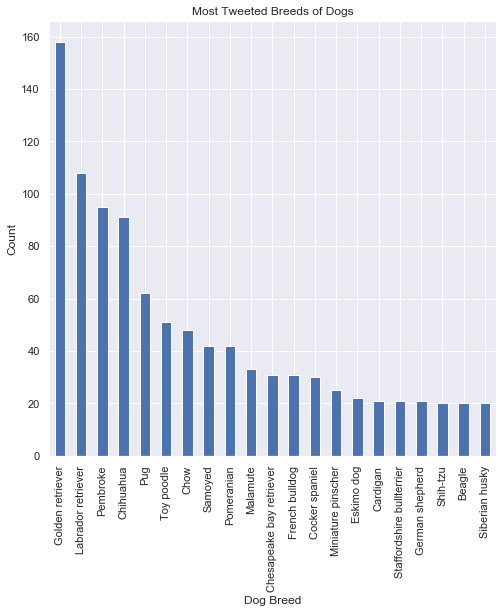

In [103]:
popular_breeds=df.groupby('breed').filter(lambda x: 200 > len(x) > 19)
popular_breeds['breed'].value_counts().plot(kind = 'bar', figsize=(8,8))
plt.title('Most Tweeted Breeds of Dogs')
plt.ylabel('Count')
plt.xlabel('Dog Breed')

From the output above, We can say the most tweeted breed of dog or popular from the @weratedogs twitter archive is the Golden retriever.

Still on the dog breeds, another insight to check from this is the the average ratings for the dog breeds that were most tweeted about

Text(0.5, 0, ' Dog Breed')

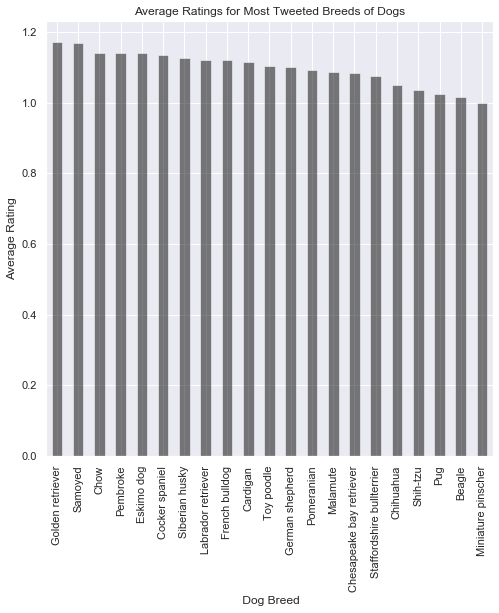

In [105]:
popular_breeds.groupby('breed')['rating'].mean().sort_values(ascending=False).plot(kind ='bar',color = 'Black',alpha=0.5,figsize=(8,8))
plt.title('Average Ratings for Most Tweeted Breeds of Dogs')
plt.ylabel('Average Rating')
plt.xlabel(' Dog Breed')

This output shows that the top 5 most popular breeds of dogs with the highest ratings are in this order in order: Golden retriever, Samoyed, Chow, Pembroke and Eskimo Dog.

Let's check out the average favourite counts for the popular dog breeds as well.  

Text(0, 0.5, 'Average favorite counts')

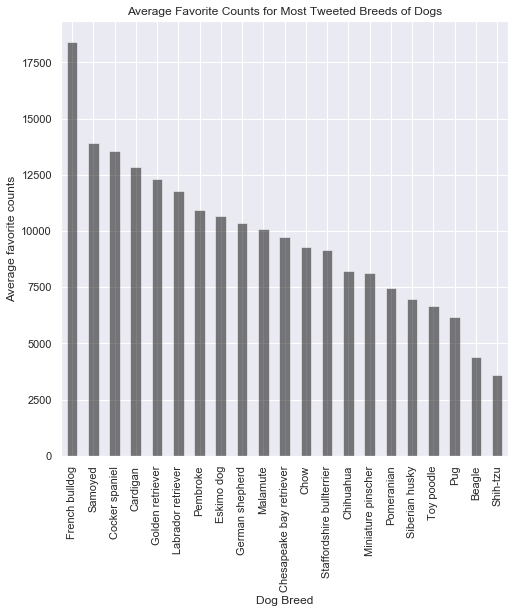

In [106]:
popular_breeds.groupby('breed')['favorite_count'].mean().sort_values(ascending=False).plot(kind ='bar', color = 'Black', alpha=0.5, figsize=(8,8))
plt.title('Average Favorite Counts for Most Tweeted Breeds of Dogs')
plt.xlabel('Dog Breed')
plt.ylabel('Average favorite counts')

The result showed that the top 5 most tweeted dog breeds with the highest number of likes are French Bulldog, Samoyed, Cocker Spaniel, Cardigan, and Golden Retriever. there are differences between most tweeted dog breeds with highest number of likes and those with highest ratings. the dogs common in both groups are Samoyed and Golden Retriever. 

Another interesting insight is to graphically check the relationship between 'retweet_count' and 'favourite_count'

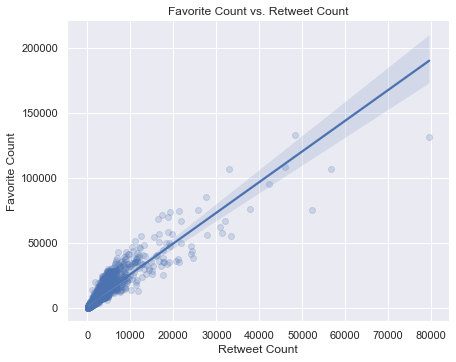

In [107]:
#plotting a graph of favorite vs retweet
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite Count vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

The scatterplot revealed that favorite counts and retweet counts are positively correlated, with the majority of the data falling below 50000 favorites and 10000 retweets.

Investigating the distribution of the dog stages is also quite interesting

In [108]:
df.dog_stage.value_counts()

None       1761
pupper      242
doggo        81
puppo        29
floofer       4
Name: dog_stage, dtype: int64

Text(0.5, 0, 'Dog Stage')

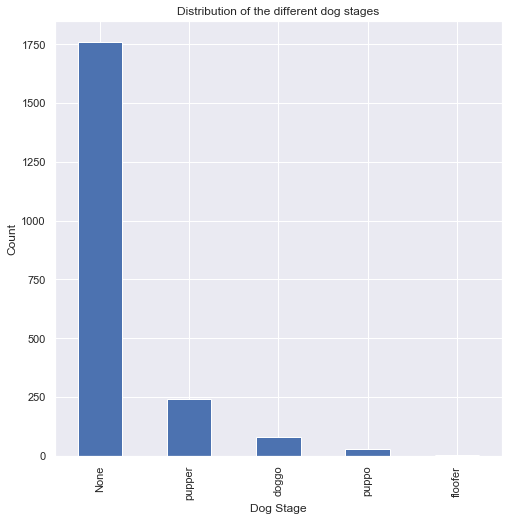

In [109]:
#plotting a bar chart to visually see the distribution of the distribution of the different dog stages
df.dog_stage.value_counts().plot(kind = 'bar', figsize=(8,8))
plt.title('Distribution of the different dog stages')
plt.ylabel('Count')
plt.xlabel('Dog Stage')

Result is showing a really high number of of dogs with unknown dog stage, further cleaning should be done on this section but for now, I will drop the 'None'. 

Text(0.5, 0, 'Dog Stage')

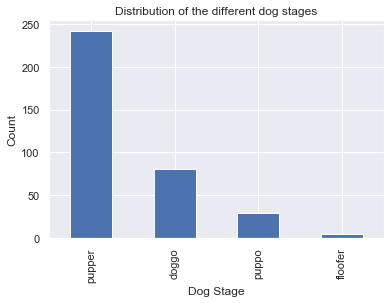

In [110]:
#dropping the 'None' category
dog_stages=df.groupby('dog_stage').filter(lambda x: len(x) < 250)
dog_stages['dog_stage'].value_counts().plot(kind = 'bar')
plt.title('Distribution of the different dog stages')
plt.ylabel('Count')
plt.xlabel('Dog Stage')

Most dogs as seen above are puppers

As conducted for the dog breeds, it will be interesting to also check the avaerage for the dog stages

Text(0, 0.5, 'Average Rating')

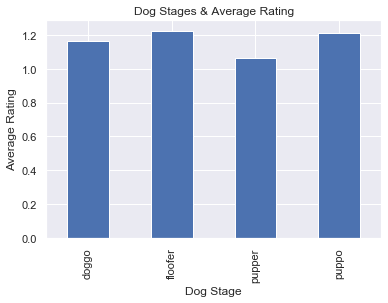

In [111]:
dog_stages.groupby('dog_stage')['rating'].mean().plot(kind='bar')
plt.title('Dog Stages & Average Rating')
plt.xlabel('Dog Stage')
plt.ylabel('Average Rating')

The floofer have the highest average rating, followed very closely by the puppos. Overlly, they all have very similar ratings.

Another interesting analysis is to check the average favorite count for the dog stages

Text(0, 0.5, 'Avarage Favorite Count')

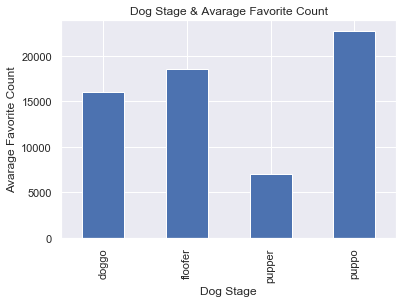

In [114]:
dog_stages.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Dog Stage & Avarage Favorite Count')
plt.xlabel('Dog Stage')
plt.ylabel('Avarage Favorite Count')

Here, it can be clearly seen that the puppos have the highest number of likes